### Домашнее задание:

__Задание 1:__ Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

__Задание 2:__ Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

__Задание 3:__ Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

__Задание 4:__ Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

__Задание 5:__ Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

__Задание 6:__ Могла ли модель переобучиться? Почему?

__Задание 7 (опциональное):__ Создайте функции eval_model_l1 и eval_model_l2 с применением L1 и L2 регуляризаций соответственно.

### Задание 1

In [708]:
import numpy as np
import matplotlib.pyplot as plt

In [709]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [710]:
def calc_logloss(y, y_pred):
    
    for i in range(len(y_pred)):
        if y_pred[i] <= 0:
            y_pred[i] = 1e-15
        elif y_pred[i] == 1.0:
            # отнимем от y_pred ничтожную величину
            y_pred[i] = y_pred[i] - 1e-15
        
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - (y_pred)))
    return err

In [711]:
# Пример применения   
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0.1])
calc_logloss(y1, y_pred1)

0.10536051565782628

### Задание 2

In [712]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

X_st = X.copy()
X_st[2, :] = calc_std_feat(X[2, :])

z = np.linspace(-100, 100, 101)


def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [713]:
def eval_model(X, y, iterations, alpha):
    i_value=[]
    logloss_value=[]
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        if i % (iterations / 10) == 0:
            print(i, W, err)
        i_value.append(i)
        logloss_value.append(err)

    return {'W':W, 'i_value':i_value,'logloss':logloss_value} 

In [714]:
def plot_eval_model(iterations=5000, alpha=1e-4):  
    eval_model_plot = eval_model(X_st, y, iterations, alpha)
    i_value = eval_model_plot['i_value']
    logloss_value = eval_model_plot['logloss']
    plt.plot(i_value, logloss_value,  label=r'iterations=1000, alpha=1e-4')
    print(logloss_value[-1])

500 [ 0.47749927 -0.19692597  0.64660127  1.4945758 ] 1.127820879406358
1000 [ 0.45886878 -0.25439917  0.64531344  1.46695851] 1.0395158244739489
1500 [ 0.44089887 -0.31020268  0.64391187  1.44036779] 0.9565773724088873
2000 [ 0.4236874  -0.36359967  0.6425439   1.41506965] 0.8807599507543653
2500 [ 0.40735199 -0.41357856  0.6414242   1.39140696] 0.8141924355796999
3000 [ 0.39201058 -0.45900098  0.64080604  1.36974771] 0.758759980653503
3500 [ 0.37774317 -0.49894982  0.64090828  1.35037357] 0.7151777920985423
4000 [ 0.36455825 -0.53307004  0.64184068  1.33337513] 0.682537501076679
4500 [ 0.35239197 -0.56162274  0.6435874   1.31863951] 0.6587997057955899
5000 [ 0.34113653 -0.58526221  0.64604926  1.30592474] 0.6416846622934699
0.6416846622934699


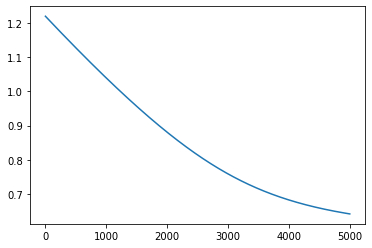

In [715]:
plot_eval_model() 


100 [ 0.4588585  -0.2544203   0.6453169   1.46694374] 1.0410271098401283
200 [ 0.42366472 -0.36366056  0.64254667  1.41503365] 0.8819616824356442
300 [ 0.39197407 -0.45912506  0.6408019   1.36968388] 0.7595098840306068
400 [ 0.36451116 -0.53324936  0.64182901  1.3332885 ] 0.6828881509068778
500 [ 0.34108547 -0.58545911  0.64603577  1.3058302 ] 0.6418288972649147
600 [ 0.32083524 -0.62105749  0.65259781  1.28534741] 0.6201376264698928
700 [ 0.30292451 -0.64542451  0.66061271  1.26984863] 0.6078121821371582
800 [ 0.28674785 -0.66226082  0.66947011  1.25790601] 0.6000844770958681
900 [ 0.27188803 -0.67393645  0.67879458  1.24855638] 0.5947360850543498
1000 [ 0.25805314 -0.68199349  0.68835345  1.24114037] 0.5906912249945011
0.5906912249945011


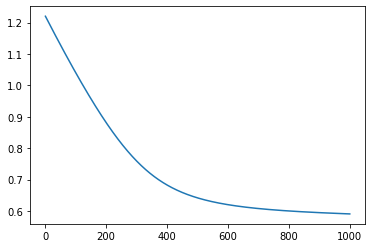

In [716]:
plot_eval_model(1000, 1e-3) 


100 [-14.57229853  -2.82745464   0.81764841  20.70706235] 3.055749331490956
200 [-25.15847321  -3.0070208   -6.08584159  21.42149314] 0.15981229197990213
300 [-28.90038322  -3.72955132  -7.62194674  23.47672368] 0.15685111533605853
400 [-31.83725773  -3.26180867  -8.45273939  26.18587154] 0.12879261974291722
500 [-33.34432839  -3.55765762  -8.70207955  27.71508979] 0.12450789970217961
600 [-34.34226535  -3.45994131  -9.19909488  28.16167299] 0.12104801409689585
700 [-35.11657086  -3.49628506  -9.43575418  28.89521857] 0.12069744666583333
800 [-35.95198443  -3.58649733  -9.66273752  29.48962031] 0.11667284982380433
900 [-36.73099408  -3.66685052  -9.88675522  30.08038969] 0.1144664436084224
1000 [-37.46873688  -3.73162813 -10.0986522   30.67087858] 0.11258093831973362
0.11258093831973362


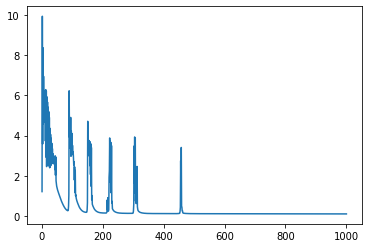

In [717]:
plot_eval_model(1000, 5) 

5 [ 0.09042917 -0.68620746  0.83606069  1.20468434] 0.5659589619119816
10 [-0.08089052 -0.68478695  0.96555467  1.24006551] 0.5431660931393896
15 [-0.2023141  -0.70353753  1.03247823  1.31330085] 0.5324080899610422
20 [-0.30239879 -0.7280578   1.07054312  1.39884818] 0.5244229221960005
25 [-0.39301386 -0.75307971  1.09379398  1.48621175] 0.5174986355186002
30 [-0.47900875 -0.77671422  1.10828251  1.57145477] 0.5112396965660181
35 [-0.56239294 -0.79838645  1.11681202  1.65327233] 0.5054940218474583
40 [-0.64402167 -0.81802069  1.12082936  1.73138957] 0.5001691063221813
45 [-0.72427502 -0.83572352  1.12118791  1.80591859] 0.49519668416461415
50 [-0.80333395 -0.85165895  1.11846257  1.8771028 ] 0.49052338664565986
0.49052338664565986


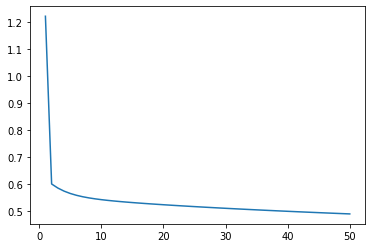

In [718]:
plot_eval_model(50, 0.5) 

### Задание 3:

In [719]:
def calc_pred_proba(w, x):
    return sigmoid(np.dot(w,x))

W = eval_model(X_st, y, 500, 1e-2)
calc_pred_proba(W['W'], X_st)

50 [ 0.34057101 -0.58744445  0.64589943  1.30487729] 0.6433165872295619
100 [ 0.25769171 -0.68297243  0.68841418  1.2405903 ] 0.5908596023453087
150 [ 0.19831398 -0.69554302  0.73607436  1.220341  ] 0.5777628225419148
200 [ 0.14805533 -0.69317972  0.77965488  1.21287192] 0.5687278067099054
250 [ 0.10324165 -0.68909229  0.81812739  1.21104179] 0.5616753351622412
300 [ 0.06257746 -0.68605867  0.85181735  1.21283095] 0.5560473747533587
350 [ 0.02537291 -0.68445722  0.88129835  1.21745441] 0.5514736771077762
400 [-0.00887935 -0.68415387  0.90713736  1.22443854] 0.5476800278385013
450 [-0.04060296 -0.68493885  0.92983924  1.23340946] 0.544463867543181
500 [-0.0701621  -0.68661758  0.94984062  1.24404686] 0.5416765996151559


array([0.39098186, 0.48714864, 0.64656064, 0.43848772, 0.78389877,
       0.69658449, 0.77855876, 0.23212065, 0.36792489, 0.74907175])

### Задание 4:

In [720]:
def calc_pred(W, X):
    return np.round(calc_pred_proba(W, X), 0)

y_pred = calc_pred(W['W'], X_st)

y, y_pred

(array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.]),
 array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1.]))

### Задание 5

In [727]:
def find_TP(y, y_pred):
    # (y_true = 1, y_pred = 1)
    return sum((y == 1) & (y_pred == 1))


def find_FN(y, y_pred):
    # (y_true = 1, y_pred = 0)
    return sum((y == 1) & (y_pred == 0))


def find_FP(y, y_pred):
    # (y_true = 0, y_pred = 1)
    return sum((y == 0) & (y_pred == 1))


def find_TN(y, y_pred):
    # (y_true = 0, y_pred = 0)
    return sum((y == 0) & (y_pred == 0))

### _матрица ошибок_ :

In [728]:
def matrix_errors(y,y_pred):
    TP = find_TP(y,y_pred)
    FN = find_FN(y,y_pred)
    FP = find_FP(y,y_pred)
    TN = find_TN(y,y_pred)
    return TP,FN,FP,TN
matrix_errors(y,y_pred)

(4, 1, 1, 4)

### _accuracy_ :

In [ ]:
def accuracy_score(y, y_pred):
    TP,FN,FP,TN = matrix_errors(y,y_pred) 
    return (TP + TN) / ( TP + FN + FP + TN)
accuracy_score(y, y_pred)

### _точность и полнота_ :

In [ ]:
def precision():
    TP,FN,FP,TN = find_conf_matrix_values(y,y_pred) 
    return TP / (TP + FP)


def recall():
    TP,FN,FP,TN = find_conf_matrix_values(y,y_pred) 
    return TP / (TP + FN)

precision(), recall()

### _F1 score_ :

In [ ]:
def f1_score():
    return 2 * precision() * recall()/precision() + recall()
f1_score()

### 6. ВОПРОС:Могла ли модель переобучиться? Почему?

Да, при увеличении параметра alfa